In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [505]:
# Load historic data
historic_data = pd.read_csv('historic.csv')

# Load prediction data
prediction_data = pd.read_csv('prediction_input.csv')

In [506]:
# Analyzing the Data
# This will display the top 5 observations of the dataset
historic_data.head()

item_no    category      main_promotion  color  stars success_indicator
0   739157       Tunic             Catalog  Green    3.1              flop
1   591846      Hoodie  Category_Highlight    Red    1.5              flop
2   337574  Sweatshirt             Catalog    Red    4.4               top
3   401933  Polo-Shirt  Category_Highlight   Blue    3.1              flop
4   812151      Hoodie  Category_Highlight  Green    4.1               top

In [507]:
# This will display the last 5 observations of the dataset
historic_data.tail()

item_no    category       main_promotion   color  stars  \
7995   280947     T-Shirt              Catalog    Blue    3.9   
7996   874952  Sweatshirt     Frontpage_Header   Green    3.5   
7997   891640     T-Shirt   Category_Highlight  Yellow    4.0   
7998   786448      Blouse   Category_Highlight    Blue    2.6   
7999   847223  Sweatshirt  Display_Ad_Campaign    Blue    3.9   

     success_indicator  
7995              flop  
7996               top  
7997              flop  
7998              flop  
7999               top

In [508]:
# This helps to understand the data type and other information about data
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_no            8000 non-null   int64  
 1   category           8000 non-null   object 
 2   main_promotion     8000 non-null   object 
 3   color              8000 non-null   object 
 4   stars              8000 non-null   float64
 5   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 375.1+ KB


In [509]:
historic_data.describe()

item_no        stars
count    8000.000000  8000.000000
mean   546474.338375     3.473075
std    256513.463874     0.978810
min    100171.000000     0.300000
25%    325001.500000     2.800000
50%    547081.000000     3.500000
75%    764312.250000     4.200000
max    989740.000000     6.100000

In [510]:
# Check if there are any duplicate values
# historic_data.nunique()
historic_data.duplicated().value_counts()

False    8000
dtype: int64

In [511]:
# Calculate Missing Values
historic_data.isnull().sum()

item_no              0
category             0
main_promotion       0
color                0
stars                0
success_indicator    0
dtype: int64

In [512]:
# item_no column in our dataset, have only ID values, assuming they don’t
# have any predictive power to predict the dependent variable we can drop it.

In [513]:
# Dropping the column
historic_data = historic_data.drop(['item_no'], axis = 1)
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   object 
 1   main_promotion     8000 non-null   object 
 2   color              8000 non-null   object 
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), object(4)
memory usage: 312.6+ KB


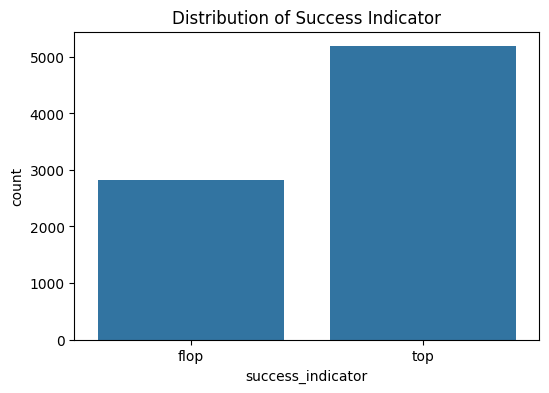

In [514]:
#visual representation of distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='success_indicator', data=historic_data)
plt.title('Distribution of Success Indicator')
plt.show()

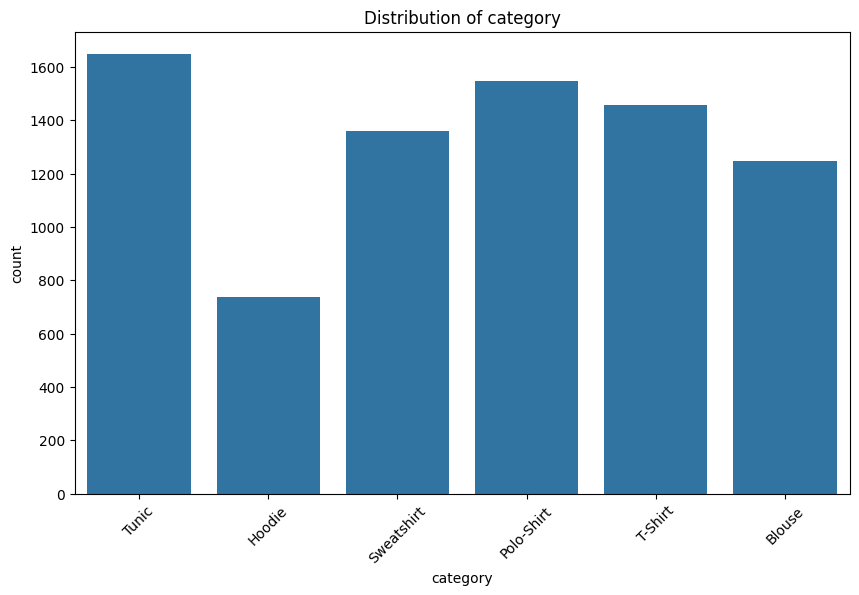

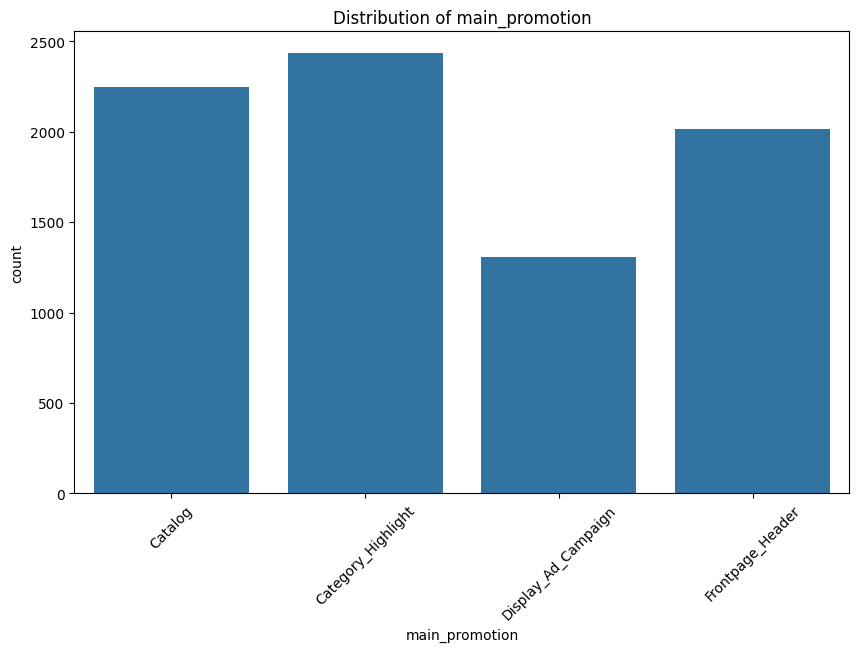

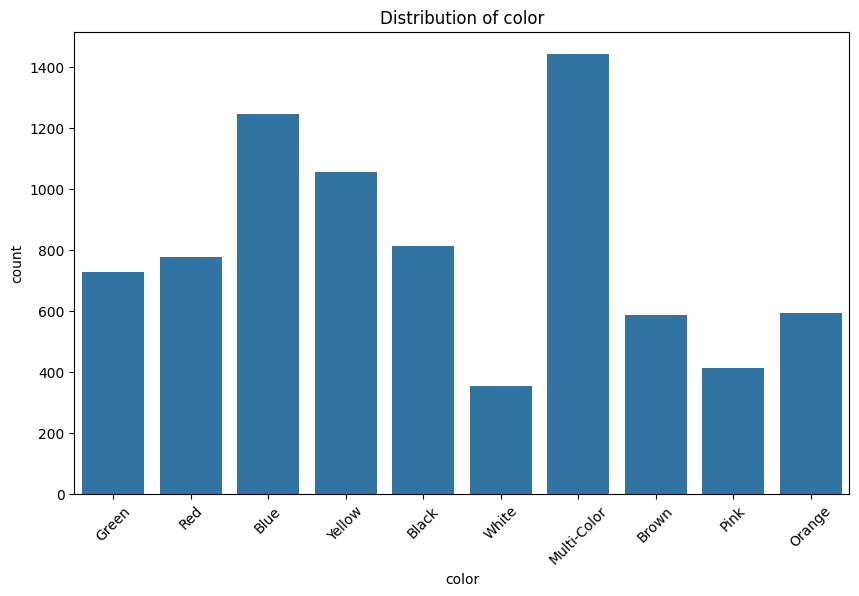

In [515]:
#visual representation of distribution of categorical features
categorical_features = ['category', 'main_promotion', 'color']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=historic_data)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()


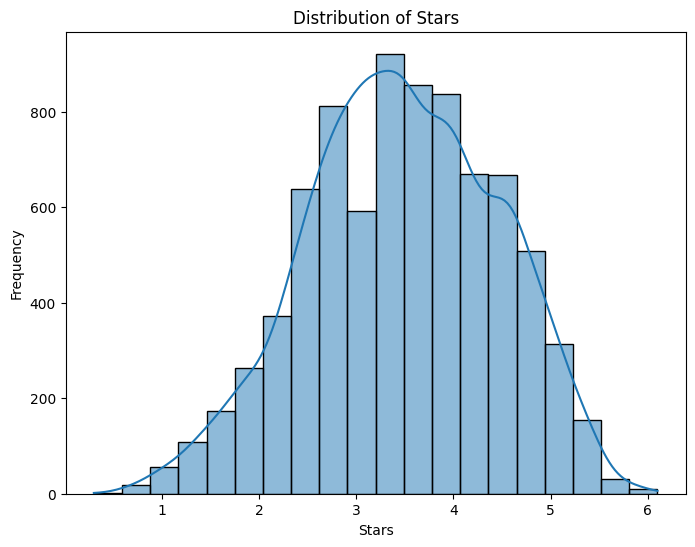

In [516]:
#visual representation of distribution of stars
plt.figure(figsize=(8, 6))
sns.histplot(historic_data['stars'], bins=20, kde=True)
plt.title('Distribution of Stars')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()

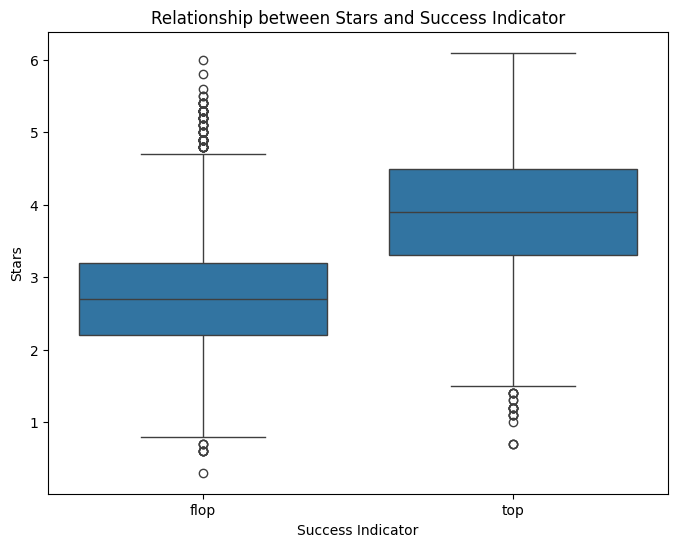

In [517]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='success_indicator', y='stars', data=historic_data)
plt.title('Relationship between Stars and Success Indicator')
plt.xlabel('Success Indicator')
plt.ylabel('Stars')
plt.show()

In [518]:
#categorical analysis
historic_data['category'].value_counts()

Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

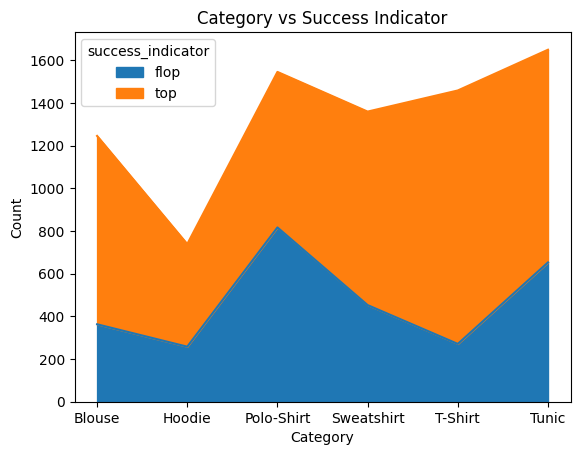

In [519]:
#visual representation of categories vs their success
graph = pd.crosstab(historic_data['category'], historic_data['success_indicator'])

# Plot stacked area plot
graph.plot.area(stacked=True)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category vs Success Indicator')
plt.show()

In [520]:
#analysis based on main promotion feature
historic_data['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

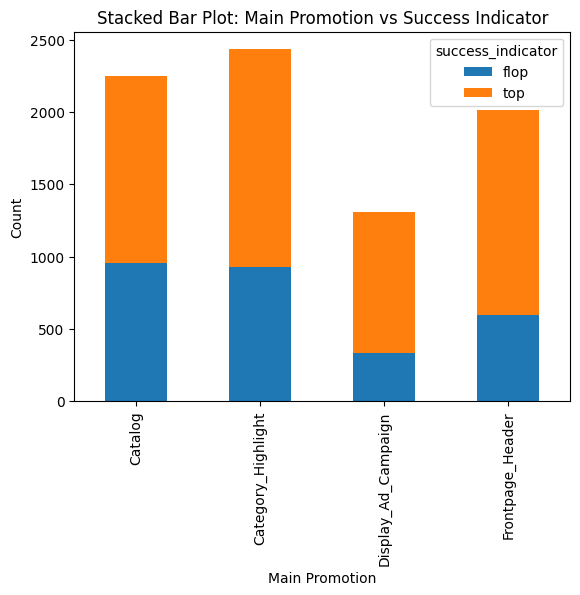

In [521]:
#visual representation of main promotion vs their success indicator
graph = pd.crosstab(historic_data['main_promotion'], historic_data['success_indicator'])
graph.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()

In [522]:
#color feature analysis
historic_data['color'].value_counts()

Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

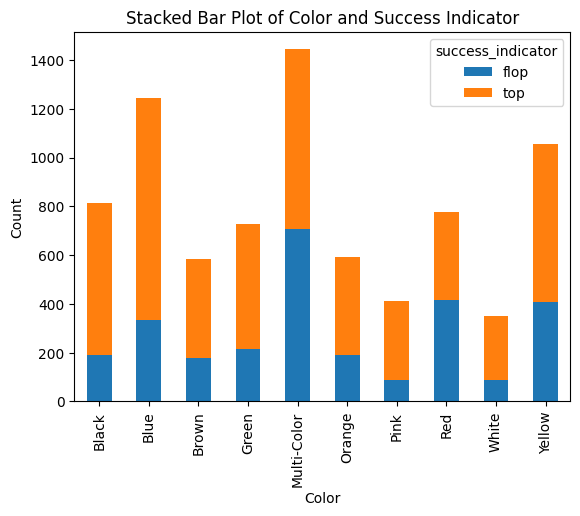

In [523]:
#visual representation of product color vs their success indicator
color = pd.crosstab(historic_data['color'], historic_data['success_indicator'])
color.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

In [524]:
#star feature analysis
historic_data['stars'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8000 entries, 0 to 7999
Series name: stars
Non-Null Count  Dtype  
--------------  -----  
8000 non-null   float64
dtypes: float64(1)
memory usage: 62.6 KB


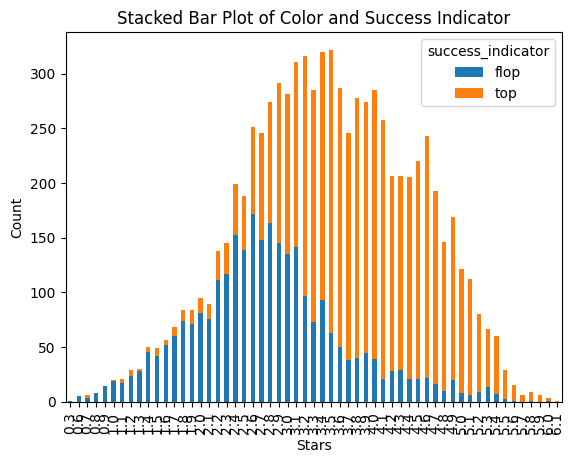

In [525]:
#visual representation of product stars vs their success indicator
star = pd.crosstab(historic_data['stars'], historic_data['success_indicator'])
star.plot(kind='bar', stacked=True)
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

Analysis of Column Category

In [526]:
historic_data['category'].value_counts()

Tunic         1650
Polo-Shirt    1546
T-Shirt       1459
Sweatshirt    1360
Blouse        1246
Hoodie         739
Name: category, dtype: int64

In [527]:
# Now we encode 6 product category into num using label encoder
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
encoded_category1 = le1.fit_transform(historic_data['category'])

In [528]:
# converting category in text to numbers
historic_data['category'] = encoded_category1

In [529]:
encoded_categories1 = le1.classes_
encoded_categories1

array(['Blouse', 'Hoodie', 'Polo-Shirt', 'Sweatshirt', 'T-Shirt', 'Tunic'],
      dtype=object)

In [530]:
# Based on following analysis we can conclude
# the success indicator  of 'T-shirt' is huge among all categories which is good for buisness
# while  in relative sense polo-shirt went flop more compared to their sucess in market

pd.crosstab(historic_data['category'], historic_data['success_indicator'])

success_indicator  flop   top
category                     
0                   363   883
1                   258   481
2                   817   729
3                   453   907
4                   271  1188
5                   653   997

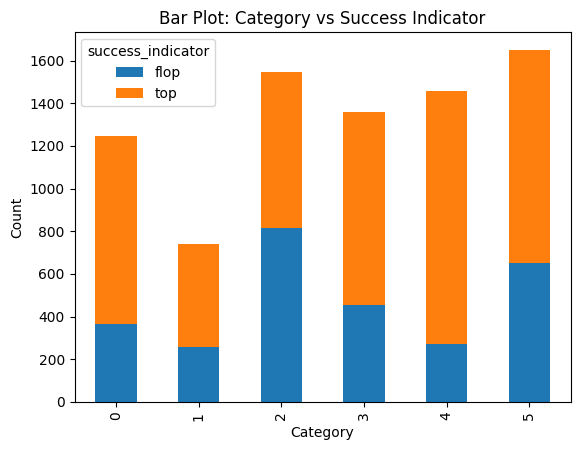

In [531]:
# as categorical features we can go for stacked_bar_plot
cross_tab = pd.crosstab(historic_data['category'], historic_data['success_indicator'])

cross_tab.plot.bar(stacked=True) # will plot the stacked bar plot

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Bar Plot: Category vs Success Indicator')
plt.show()

In [532]:
historic_data[historic_data['category'] == 0].shape
historic_data[(historic_data['category'] ==  0 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [533]:
historic_data[historic_data['category'] == 1].shape
historic_data[(historic_data['category'] ==  1 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [534]:
historic_data[historic_data['category'] == 2].shape
historic_data[(historic_data['category'] ==  2 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [535]:
historic_data[historic_data['category'] == 3].shape
historic_data[(historic_data['category'] ==  3 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [536]:
historic_data[historic_data['category'] == 4].shape
historic_data[(historic_data['category'] ==  4 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [537]:
historic_data[historic_data['category'] == 5].shape
historic_data[(historic_data['category'] ==  5 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

**Analysis of Column Main Promotion**

In [538]:
historic_data['main_promotion'].value_counts()

Category_Highlight     2432
Catalog                2246
Frontpage_Header       2013
Display_Ad_Campaign    1309
Name: main_promotion, dtype: int64

In [539]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded 6 product category into num using label encoder
le2 = LabelEncoder()
encoded_main_promotion = le2.fit_transform(historic_data['main_promotion'])

In [540]:
historic_data['main_promotion'] = encoded_main_promotion

In [541]:
encoded_categories_mp = le2.classes_
encoded_categories_mp

array(['Catalog', 'Category_Highlight', 'Display_Ad_Campaign',
       'Frontpage_Header'], dtype=object)

In [542]:
encoded_values2 = le2.transform(encoded_categories_mp)
category_mapping2 = dict(zip(encoded_categories_mp, encoded_values2)) # dictionary mapping the names to the numerical values
for mp, value2 in category_mapping2.items():
    print(f"Encoded Category: {mp}, Encoded Value: {value2}")  # encoded value with its original name

Encoded Category: Catalog, Encoded Value: 0
Encoded Category: Category_Highlight, Encoded Value: 1
Encoded Category: Display_Ad_Campaign, Encoded Value: 2
Encoded Category: Frontpage_Header, Encoded Value: 3


In [543]:
# Bivarite of main_promotion and success_indicator feature

In [544]:
cross_tab2 = pd.crosstab(historic_data['main_promotion'], historic_data['success_indicator'])
cross_tab2

success_indicator  flop   top
main_promotion               
0                   953  1293
1                   930  1502
2                   335   974
3                   597  1416

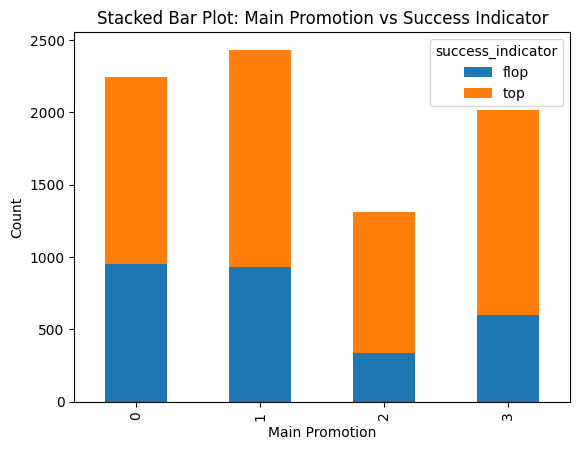

In [545]:
cross_tab2 = pd.crosstab(historic_data['main_promotion'], historic_data['success_indicator'])
cross_tab2.plot.bar(stacked=True)
plt.xlabel('Main Promotion')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Main Promotion vs Success Indicator')
plt.show()

In [546]:
historic_data[historic_data['main_promotion'] == 0].shape
historic_data[(historic_data['main_promotion'] == 0  ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [547]:
historic_data[historic_data['main_promotion'] == 1].shape
historic_data[(historic_data['main_promotion'] ==  1 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [548]:
historic_data[historic_data['main_promotion'] == 2].shape
historic_data[(historic_data['main_promotion'] == 2  ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [549]:
historic_data[historic_data['main_promotion'] == 3].shape
historic_data[(historic_data['main_promotion'] == 3  ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

Analysis of Column Color

In [550]:
historic_data['color'].value_counts()

Multi-Color    1443
Blue           1244
Yellow         1056
Black           812
Red             776
Green           728
Orange          592
Brown           585
Pink            412
White           352
Name: color, dtype: int64

In [551]:
from sklearn.preprocessing import LabelEncoder    # here we have encoded color category into num using label encoder
le3 = LabelEncoder()
encoded_color = le3.fit_transform(historic_data['color'])
print(encoded_color)

[3 7 7 ... 9 1 1]


In [552]:
historic_data['color'] = encoded_color

In [553]:
encoded_color_class = le3.classes_
encoded_color_class

array(['Black', 'Blue', 'Brown', 'Green', 'Multi-Color', 'Orange', 'Pink',
       'Red', 'White', 'Yellow'], dtype=object)

In [554]:
encoded_values3 = le3.transform(encoded_color_class)
category_mapping3 = dict(zip(encoded_color_class, encoded_values3)) # dictionary mapping the names to the numerical values
for color, value3 in category_mapping3.items():
    print(f"Encoded Category: {color}, Encoded Value: {value3}")  # encoded value with its original name

Encoded Category: Black, Encoded Value: 0
Encoded Category: Blue, Encoded Value: 1
Encoded Category: Brown, Encoded Value: 2
Encoded Category: Green, Encoded Value: 3
Encoded Category: Multi-Color, Encoded Value: 4
Encoded Category: Orange, Encoded Value: 5
Encoded Category: Pink, Encoded Value: 6
Encoded Category: Red, Encoded Value: 7
Encoded Category: White, Encoded Value: 8
Encoded Category: Yellow, Encoded Value: 9


In [555]:
historic_data.head()

category  main_promotion  color  stars success_indicator
0         5               0      3    3.1              flop
1         1               1      7    1.5              flop
2         3               0      7    4.4               top
3         2               1      1    3.1              flop
4         1               1      3    4.1               top

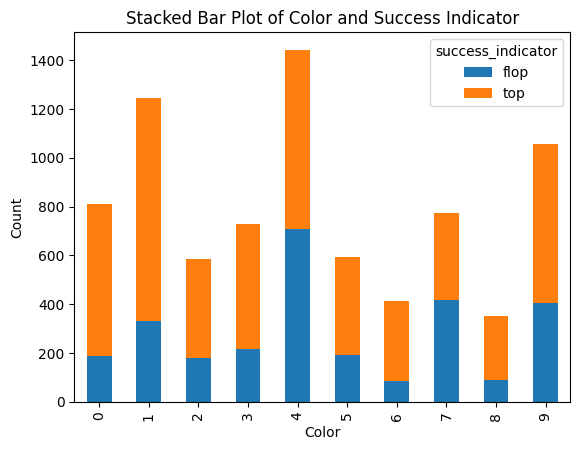

In [556]:
ct = pd.crosstab(historic_data['color'], historic_data['success_indicator'])
ct.plot(kind='bar', stacked=True)
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Color and Success Indicator')
plt.show()

In [557]:
historic_data[historic_data['color'] == 0].shape
historic_data[(historic_data['color'] == 0  ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [558]:
historic_data[historic_data['color'] == 1].shape
historic_data[(historic_data['color'] == 1  ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [559]:
historic_data[historic_data['color'] == 2].shape
historic_data[(historic_data['color'] == 2  ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [560]:
historic_data[historic_data['color'] == 3].shape
historic_data[(historic_data['color'] == 3  ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [561]:
historic_data[historic_data['color'] == 4].shape
historic_data[(historic_data['color'] == 4 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [562]:
historic_data[historic_data['color'] == 5].shape
historic_data[(historic_data['color'] == 5 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [563]:
historic_data[historic_data['color'] == 6].shape
historic_data[(historic_data['color'] == 6 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [564]:
historic_data[historic_data['color'] == 7].shape
historic_data[(historic_data['color'] == 7 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [565]:
historic_data[historic_data['color'] == 8].shape
historic_data[(historic_data['color'] == 8 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [566]:
historic_data[historic_data['color'] == 9].shape
historic_data[(historic_data['color'] == 9 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

Analysis of Column Stars

In [567]:
historic_data.info() # original datatype of stars column is object but for num condition we have to convert it into float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [568]:
# Change data type of "Stars" from object to float
historic_data['stars'] = historic_data['stars'].astype(float)

In [569]:
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [570]:
historic_data['stars'] = np.where(historic_data['stars'] <= 3, 0, historic_data['stars'])

In [571]:
historic_data['stars'] = np.where(historic_data['stars'] > 3, 1, historic_data['stars'])

In [572]:
historic_data['stars'].value_counts()

1.0    5278
0.0    2722
Name: stars, dtype: int64

In [573]:
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 312.6+ KB


In [574]:
historic_data.head()

category  main_promotion  color  stars success_indicator
0         5               0      3    1.0              flop
1         1               1      7    0.0              flop
2         3               0      7    1.0               top
3         2               1      1    1.0              flop
4         1               1      3    1.0               top

In [575]:
historic_data[historic_data['stars'] == 1].shape
historic_data[(historic_data['stars'] == 1 ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

In [576]:
historic_data[historic_data['stars'] == 0].shape
historic_data[(historic_data['stars'] == 0  ) & (historic_data['success_indicator'] == 1)].shape

(0, 5)

Analysis of Column Success Indicator

In [577]:
historic_data['success_indicator'].value_counts()

top     5185
flop    2815
Name: success_indicator, dtype: int64

In [578]:
encoder = LabelEncoder()
historic_data['success_indicator'] = encoder.fit_transform(historic_data['success_indicator'])

In [579]:
historic_data['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

In [580]:
historic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   category           8000 non-null   int64  
 1   main_promotion     8000 non-null   int64  
 2   color              8000 non-null   int64  
 3   stars              8000 non-null   float64
 4   success_indicator  8000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 312.6 KB


In [581]:
historic_data.shape

(8000, 5)

**Checking the balance of the Dataset**

In [582]:
historic_data['success_indicator'].value_counts()

1    5185
0    2815
Name: success_indicator, dtype: int64

In [583]:
(2815/8000)*100  # 35% of data belongs to 'FLOP'/0 class

35.1875

In [584]:
(5185/8000)*100  # 65% of data belongs to 'TOP'/1 class

64.8125

In [585]:
from imblearn.over_sampling import SMOTE
x = historic_data.drop('success_indicator', axis=1)
y = historic_data['success_indicator']

In [586]:
smote = SMOTE()
x_balanced, y_balanced = smote.fit_resample(x, y)
df_balanced = pd.concat([x_balanced, y_balanced], axis=1)
print(df_balanced)

       category  main_promotion  color  stars  success_indicator
0             5               0      3    1.0                  0
1             1               1      7    0.0                  0
2             3               0      7    1.0                  1
3             2               1      1    1.0                  0
4             1               1      3    1.0                  1
...         ...             ...    ...    ...                ...
10365         5               1      9    1.0                  0
10366         4               0      4    0.0                  0
10367         2               0      9    1.0                  0
10368         3               0      4    0.0                  0
10369         2               3      9    0.0                  0

[10370 rows x 5 columns]


In [587]:
df_balanced.head()

category  main_promotion  color  stars  success_indicator
0         5               0      3    1.0                  0
1         1               1      7    0.0                  0
2         3               0      7    1.0                  1
3         2               1      1    1.0                  0
4         1               1      3    1.0                  1

In [588]:
df_balanced.shape

(10370, 5)

In [589]:
df_balanced['success_indicator'].value_counts()

0    5185
1    5185
Name: success_indicator, dtype: int64

In [590]:
df_balanced.to_csv('train_df.csv',index=False)